Mean Squared Error: 0.3261448637312595


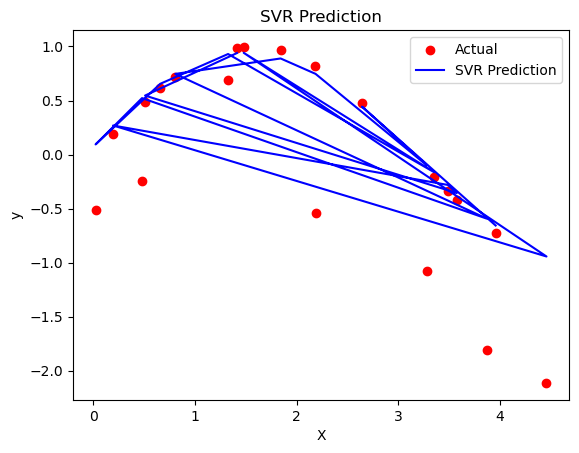

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Generating sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Adding noise to the targets
y[::5] += 3 * (0.5 - np.random.rand(20))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Initializing and training the SVR model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train_scaled, y_train_scaled)

# Predicting the test set results
y_pred_scaled = svr_rbf.predict(sc_X.transform(X_test))
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualizing the SVR results
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_test, y_pred, color='blue', label='SVR Prediction')
plt.title('SVR Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()